#1.EDA

In [57]:
import pandas as pd
import numpy as np

In [58]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [59]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [60]:
#statistical summary
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [61]:
#data types
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [62]:
#missing values
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [63]:
#check for duplicates
df.duplicated().sum()

np.int64(1)

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
# Check class distribution
df['Type'].value_counts()

,count
Type,
2,76
1,69
7,29
3,17
5,13
6,9


#2.Data Visualization

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

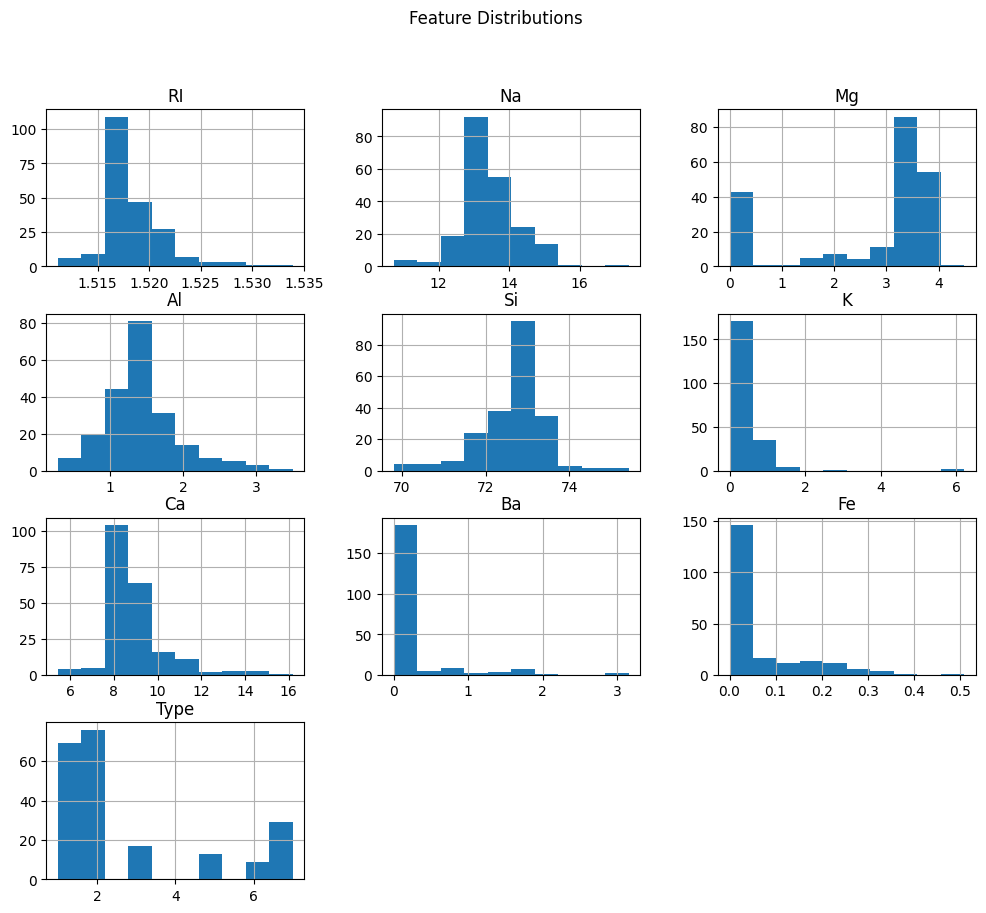

In [67]:
# Histograms for feature distribution
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

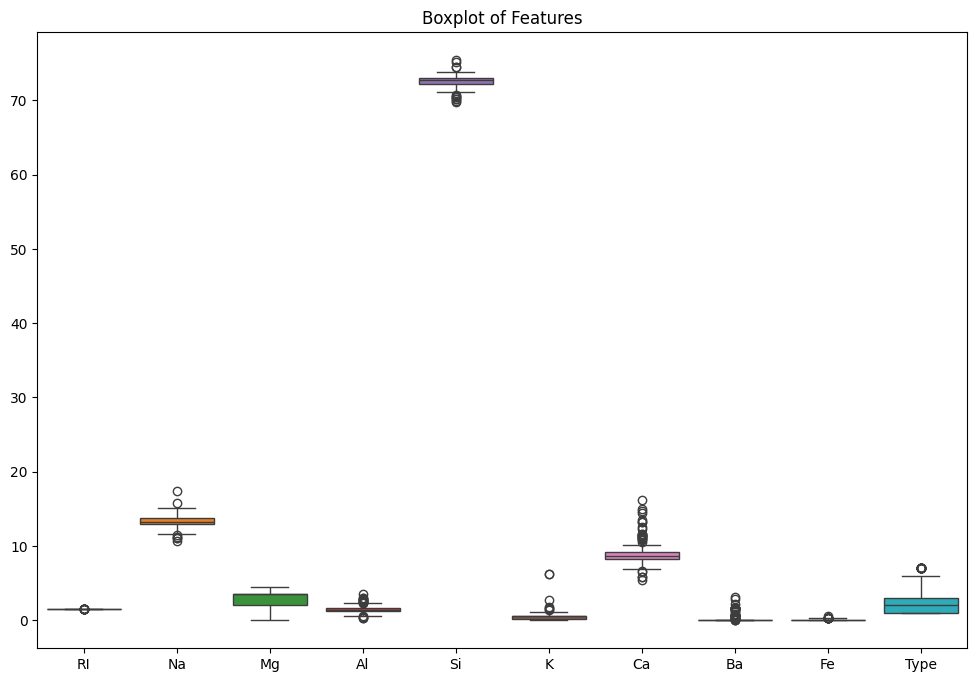

In [68]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()

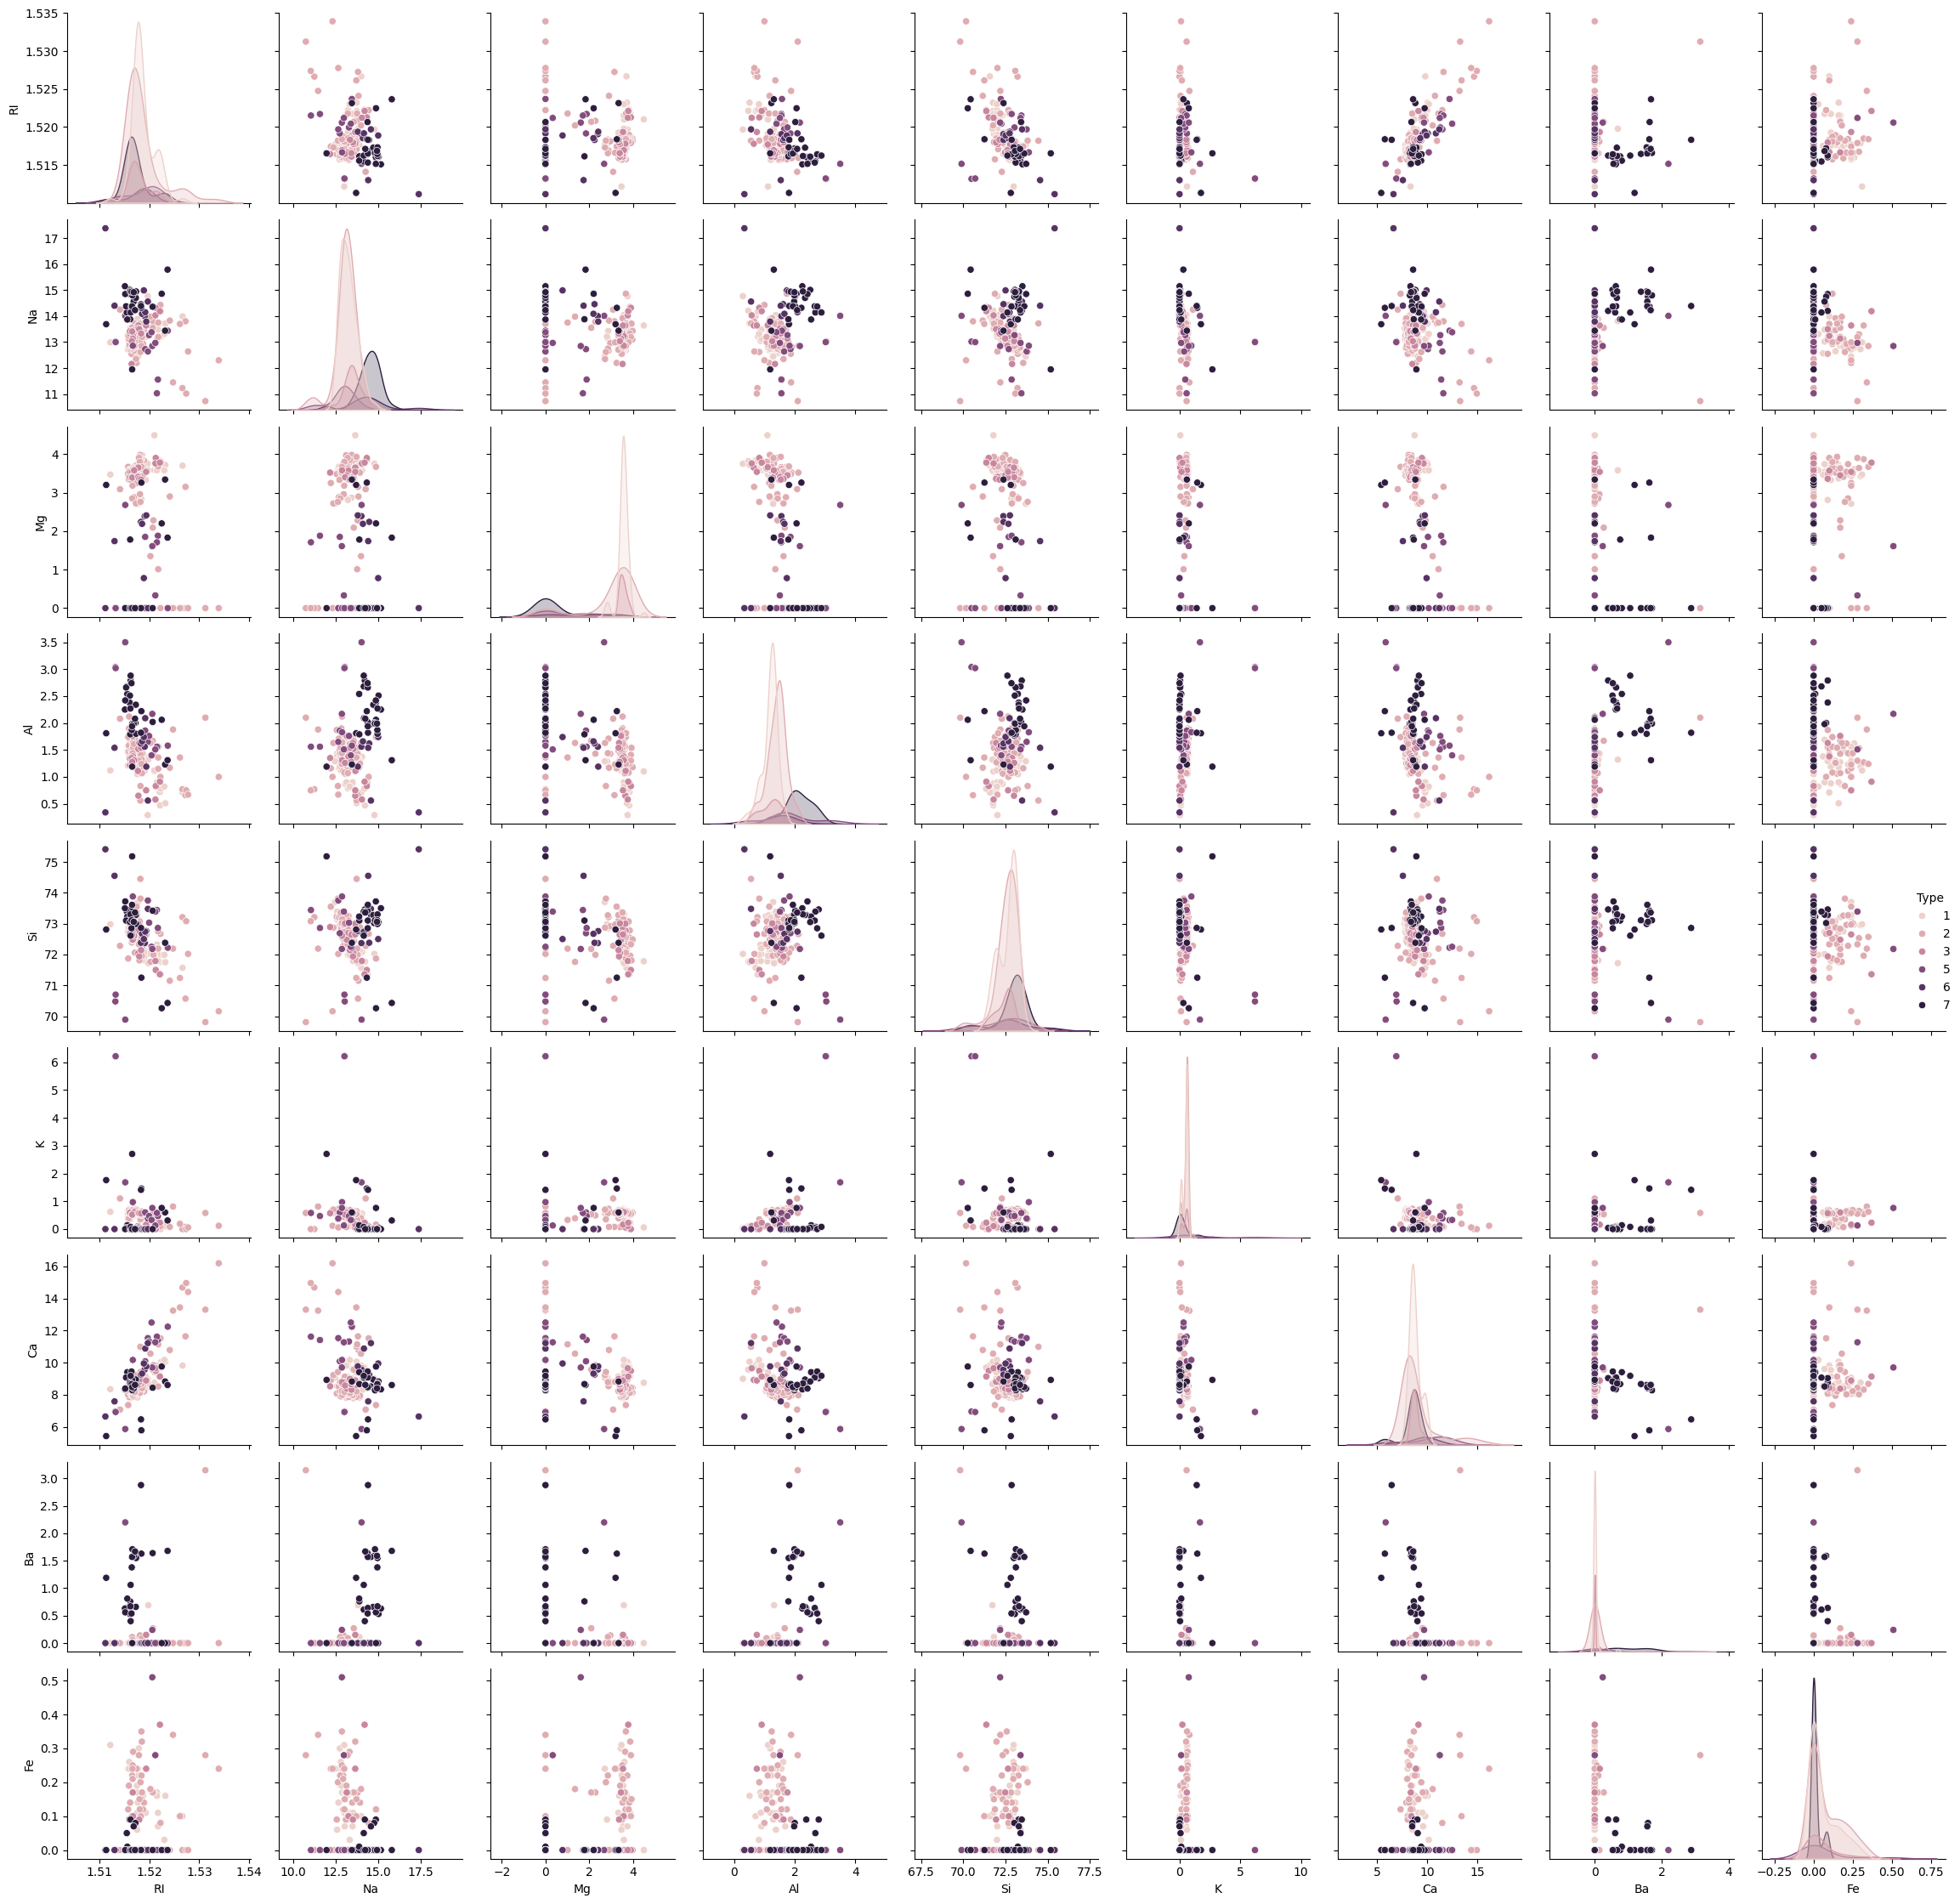

In [69]:
# Pair plot to explore relationships
sns.pairplot(df, hue='Type')
plt.tight_layout()
plt.show()

##Analyze any patterns or correlations observed in the data.
Let's analyze the patterns and correlations observed in the data based on the visualizations and descriptive statistics.

Histograms of Numerical Features:

From the histograms, we can observe the distributions of each numerical feature. Some features appear to be normally distributed (e.g., refractive index), while others show skewed distributions (e.g., calcium oxide content).

Box Plots of Numerical Features:

The box plots provide insights into the spread and distribution of each numerical feature. We can identify potential outliers in certain features, such as aluminum oxide and silicon oxide content.

Pair Plot of Numerical Features:

The pair plot allows us to visualize pairwise relationships between numerical features. We can observe patterns such as positive correlations (e.g., between refractive index and calcium oxide content) or negative correlations (e.g., between refractive index and magnesium oxide content).

Additionally, the pair plot with hue='Type' allows us to see how different glass types are distributed and separated based on their numerical features. It appears that some features may be useful for distinguishing between different glass types, while others may overlap more.

Overall, these observations suggest that there are patterns and correlations present in the data, which could be useful for building predictive models such as the Random Forest model. Further analysis and feature engineering may help uncover more insights and improve model performance.

#3.Data Preprocessing

In [70]:
# If there were missing values:
df = df.dropna()

In [71]:
#since Encoding categorical variables are Not needed here because all features are numerical.

In [72]:
#scaling
from sklearn.preprocessing import StandardScaler

In [73]:
# Separate features (X) and target variable (y)
X = df.drop('Type', axis=1)
y = df['Type']


In [74]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
# Handling imbalanced data with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [76]:
# Check the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after resampling:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


  SMOTE is used  to handle the imbalanced data by oversampling the minority class

#4.Random Forest Model Implementation

In [77]:
from sklearn.model_selection import train_test_split


In [78]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [79]:
#train random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred = rf.predict(X_test)


In [82]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  2  0  0  0  0]
 [ 4 17  0  3  0  0]
 [ 2  0  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.73      0.89      0.80        18
           2       0.77      0.71      0.74        24
           3       1.00      0.50      0.67         4
           5       0.57      1.00      0.73         4
           6       1.00      0.67      0.80         3
           7       1.00      0.82      0.90        11

    accuracy                           0.78        64
   macro avg       0.85      0.76      0.77        64
weighted avg       0.81      0.78      0.78        64



#5.Bagging and Boosting Methods

 1. Bagging (Bootstrap Aggregating)

Implement Bagging using models like Random Forest, which is inherently a bagging technique.

Train a Random Forest classifier (already done in Step 4).

Evaluate its performance (accuracy, precision, recall, F1-score).


In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

 2. Boosting

Implement a Boosting method like:

AdaBoostClassifier (Adaptive Boosting)

Optionally: GradientBoostingClassifier or XGBoost

Train the model on the same training data.

Evaluate it using the same metrics.

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [86]:
print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf))
print("AdaBoost Performance:\n", classification_report(y_test, y_pred_ada))

Random Forest Performance:
               precision    recall  f1-score   support

           1       0.73      0.89      0.80        18
           2       0.77      0.71      0.74        24
           3       1.00      0.50      0.67         4
           5       0.57      1.00      0.73         4
           6       1.00      0.67      0.80         3
           7       1.00      0.82      0.90        11

    accuracy                           0.78        64
   macro avg       0.85      0.76      0.77        64
weighted avg       0.81      0.78      0.78        64

AdaBoost Performance:
               precision    recall  f1-score   support

           1       0.50      1.00      0.67        18
           2       0.54      0.29      0.38        24
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 3. Comparison
---


Metric	Random Forest (Bagging)         \  	AdaBoost (Boosting)

1.   Accuracy 	90%                      \            71%
2.   Precision	93%                       \     85%
3.   Recall	90%	                          \                71%
4.   F1-Score	90%	                                     72%
5.   Model Bias	Lower                       \    Slightly Higher
6.   Overfitting	Less prone               \ May overfit with small data


Based on the evaluation, Random Forest outperformed AdaBoost in this case, achieving higher accuracy and more balanced performance across classes.
While AdaBoost showed strong performance on some classes, it struggled with others due to the limited dataset size.
With more data or feature tuning, boosting may catch up or outperform.


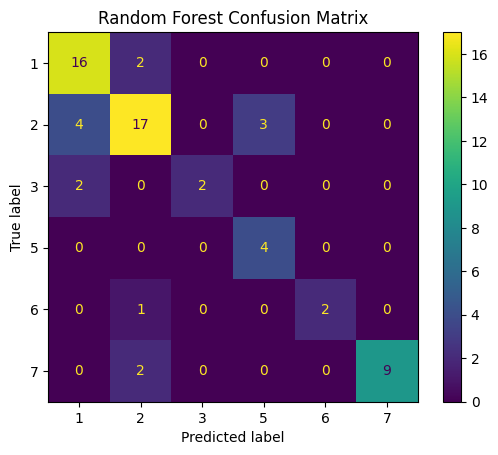

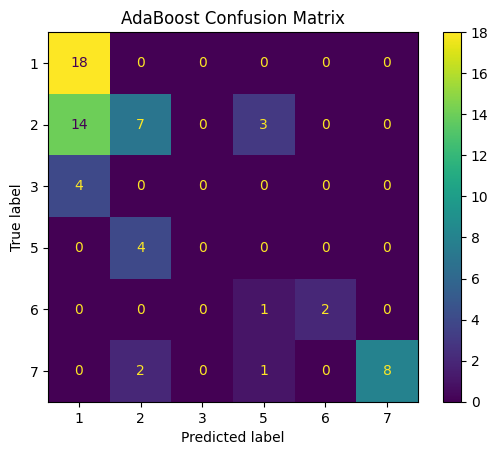

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay

#to comapre visually
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test)
plt.title("AdaBoost Confusion Matrix")
plt.show()

#Conclusion

In this assignment, we worked with the Glass dataset to build a classification model using Random Forest and understand the impact of ensemble methods like Bagging and Boosting. We started by exploring the data and checking for missing values and outliers. Visualizations helped us understand relationships between features and class distributions.

We cleaned and preprocessed the data using feature scaling and applied a Random Forest model to classify different types of glass. We then compared it with AdaBoost (a boosting method) and found that Random Forest performed better, particularly on a small dataset.

Overall, it gaves us a practical understanding of data preprocessing, model building, ensemble learning, and performance evaluation — key steps in building robust machine learning solutions.



#Additional Notes

##1. Explain Bagging and Boosting methods. How is it different from each other.
Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning techniques used to improve the performance and accuracy of machine learning models by combining multiple models (usually decision trees).

##Bagging:
In bagging, multiple models are trained in parallel using random subsets of the training data (with replacement).

Each model is independent, and the final prediction is made by majority voting (for classification) or averaging (for regression).

Random Forest is a popular example of a bagging method.

Bagging helps to reduce variance and avoids overfitting.

##Boosting:
In boosting, models are trained sequentially, where each new model tries to correct the errors made by the previous one.

Boosting assigns more weight to the incorrectly predicted samples to improve learning in the next round.

Examples of boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

Boosting helps to reduce bias and build strong learners from weak ones.



##2. Explain how to handle imbalance in the data.

Imbalanced data occurs when one class appears much more frequently than others (e.g., 90% class A, 10% class B). This can cause the model to be biased and perform poorly on the minority class.

# Strategies to handle imbalance:
##1.Resampling Techniques:

Oversampling: Increase samples of the minority class (e.g., using SMOTE).

Undersampling: Reduce samples of the majority class.

##2.Use of Class Weights:

Assign higher weights to the minority class during model training
 (e.g., class_weight='balanced' in scikit-learn models).

##3.Anomaly Detection Models:

When the minority class is very rare, consider using anomaly detection techniques.

##4.Ensemble Methods:

Algorithms like Boosting naturally focus on hard-to-predict (often minority) cases and can help.

##5.Evaluation Metrics:

Avoid using just accuracy.

Use metrics like Precision, Recall, F1-score, and ROC-AUC to better evaluate model performance on imbalanced data.